# Project 6: Batch Fermentation Reactor

<img src="Images/FermentationReactor.jpg" alt="Batch" width="400"/>

In [1]:
"""HW 6 Plotting for Question 4. 

The Euler's method loop is a function that will solve the system
of ODEs when the input ABV is reached. Use a while loop to make the
loop end when the ABV is reached """

import numpy as np
from numpy import *
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

### Define parameters

In [2]:
#Step size and total number of iterations
t_f = 12 # Final time [h]
N = 500  # Number of points in Euler Loop 
t = linspace(0,t_f,N)  # Create N points between t = 0 and t = 9 hrs
del_t = t[1]-t[0] # Step-size (points are equally spaced)

# Concentration Parameters (gc per gram broth)
s_0  = (72/180)*0.24  # Initial substrate concentration (Use carbon to get concentration)
X_0 = 0.001           # Initial cell concentration
p_0 = 0               # Initial product concentration

# Rate Parameters
K_s = 0.001   # Rate constant parameter from Monod equation
p_max = 0.109 # Maximum production concentration
mu_max = 0.5
m_s = 0.008   # [1/h] Maintenance Coefficients
Y_Xs = 1      # Yield obtained from the problem

### Set up function and perform Euler method loop to solve problem

In [3]:
# Use a function that takes in ABV and coefficient to p in the equation for ABV
def beer(coeff,ABV):
  # Create vectors to store data:
  s_vec, X_vec, p_vec = [], [], []  # intialize vectors to store values
  
  # Add initial values into lists
  s_vec.append(s_0)
  X_vec.append(X_0)
  p_vec.append(p_0)

  # Initialize three concentrations before loop
  s = s_0
  X = X_0
  p = p_0

  i = 0 # Will need to set 
  while coeff*p <= ABV: # Use a while loop so that loop stops when ABV is reached
    
    dXdt = mu_max*X*s*(1 - p/p_max)/(K_s+s) # Biomass ODE, assume m = 1 for dXdt
    dsdt = -dXdt - m_s*Y_Xs*X               # Substrate ODE
    dpdt = dXdt/2.0 + m_s*Y_Xs*X            # Product ODE

    X += del_t*dXdt                         # Update Biomass concentration
    s += del_t*dsdt                         # Update Substrate concentration
    p += del_t*dpdt                         # Update Product concentration

    # Add new values to vectors for plotting
    X_vec.append(X)                         
    s_vec.append(s)
    p_vec.append(p)

    i += 1                                  # Update i as this is a while loop

  return X_vec, s_vec, p_vec, i

# Extract final C_X, C_s, C_p, and index i (used to find t) for both types of beer
X_am, s_am, p_am, i_am = beer(1.619,0.04)  # American Beer
X_real, s_real, p_real, i_real = beer(1.714,0.06) # Real Beer

# Calculate batch time using the final iterant from the loop 
t_batch_am  = round(t[i_am],2)      
t_batch_real = round(t[i_real],2)   

### Plot concentrations of product, biomass, and substrate ($C_p$, $C_X$, $C_S$, respectively) of two types of beer

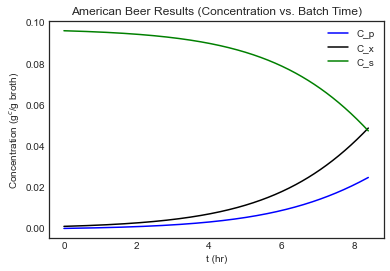

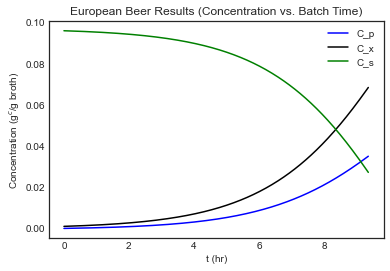

In [5]:
# Plot results in 2 figures
plt.figure(1)
plt.plot(t[0:len(p_am)], p_am, label="C_p",color='blue')  # Product plot
plt.plot(t[0:len(p_am)], X_am,label="C_x", color='black')  # Biomass plot
plt.plot(t[0:len(p_am)], s_am,label="C_s", color = 'green') # Substrate plot
plt.xlabel("t (hr)")                                      # Show units for time axis
plt.ylabel("Concentration (g$^c$/g broth)")               # Show units for Concentration axis
plt.legend(loc='upper right')
plt.title('American Beer Results (Concentration vs. Batch Time)')

plt.figure(2)
plt.plot(t[0:len(p_real)], p_real, label="C_p",color='blue')  # Product plot
plt.plot(t[0:len(p_real)], X_real,label="C_x", color='black')  # Biomass plot
plt.plot(t[0:len(p_real)], s_real,label="C_s", color = 'green')  # Substrate plot
plt.xlabel("t (hr)")                                      # Show units for time axis
plt.ylabel("Concentration (g$^c$/g broth)")               # Show units for Concentration axis
plt.legend(loc='upper right')
plt.title('European Beer Results (Concentration vs. Batch Time)')

plt.show()